In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peiro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")
NEWS_API='e0718f7ead1f4f72a87fd790e6d77d58'

In [18]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=NEWS_API)
print(newsapi)

In [19]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles['totalResults']

7131

In [23]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']

2798

In [24]:
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [25]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.5574,0.036,0.838,0.127,You won't have to stick to Bitcoin if you're d...
1,0.0000,0.000,1.000,0.000,Four months after Twitter first introduced in-...
2,0.0000,0.000,1.000,0.000,Its the countrys latest crackdown on digital c...
3,0.1779,0.000,0.948,0.052,A recently-installed Bitcoin ATM.\r\n\n \n\n A...
4,0.1280,0.000,0.954,0.046,The government of El Salvador purchased at lea...
5,0.5423,0.034,0.847,0.119,Twitter will now allow people to tip their fav...
6,-0.7096,0.195,0.765,0.040,"image captionProtesters held signs reading ""no..."
7,-0.2960,0.114,0.833,0.053,By Joe TidyCyber reporter \r\nTaxi driver Chri...
8,0.2023,0.054,0.872,0.074,New York (CNN Business)It's a volatile day for...
9,0.0000,0.000,1.000,0.000,"8. Were just days into September, and its time..."


In [26]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.0000,0.000,1.000,0.000,Its the countrys latest crackdown on digital c...
1,0.7351,0.000,0.833,0.167,As the broader crypto world enjoys a late summ...
2,0.5574,0.036,0.838,0.127,You won't have to stick to Bitcoin if you're d...
3,0.2865,0.126,0.694,0.180,OpenSea isn't wasting much time after its head...
4,0.4588,0.000,0.892,0.108,Robinhood plans to start a cryptocurrency wall...
5,0.6705,0.000,0.812,0.188,image credit:Sorare\r\nFrench startup Sorare h...
6,0.0000,0.000,1.000,0.000,Vitalik Buterin\r\nVitalik Buterin dreamed up ...
7,0.0000,0.000,1.000,0.000,Cardano ada\r\nSOPA images\r\nThe cardano netw...
8,0.8765,0.000,0.755,0.245,The world is slowly but surely making a shift ...
9,-0.6705,0.169,0.831,0.000,Sen. Elizabeth Warren.\r\nGREG NASH/POOL/AFP v...


In [27]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.061570,0.036250,0.914150,0.049650
std,0.349275,0.053955,0.063825,0.041716
min,-0.709600,0.000000,0.765000,0.000000
25%,0.000000,0.000000,0.881750,0.000000
50%,0.089800,0.000000,0.909000,0.048500
75%,0.252200,0.045750,0.951750,0.076250
max,0.557400,0.195000,1.000000,0.127000


In [28]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.255625,0.021450,0.891500,0.087150
std,0.371892,0.049276,0.083874,0.071458
min,-0.670500,0.000000,0.694000,0.000000
25%,0.000000,0.000000,0.836750,0.034500
50%,0.302350,0.000000,0.904500,0.087500
75%,0.458800,0.000000,0.952500,0.129250
max,0.876500,0.169000,1.000000,0.245000


In [29]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [30]:
# Instantiate the lemmatizer
# Create a list of stopwords
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [31]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
    
    # Convert the words to lowercase and Remove the stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize Words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
    
    return root_words

In [32]:
# Create a new tokens column for bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.5574,0.036,0.838,0.127,You won't have to stick to Bitcoin if you're d...,"[wont, stick, bitcoin, youre, determined, pay,..."
1,0.0000,0.000,1.000,0.000,Four months after Twitter first introduced in-...,"[four, month, twitter, first, introduced, inap..."
2,0.0000,0.000,1.000,0.000,Its the countrys latest crackdown on digital c...,"[country, latest, crackdown, digital, currenci..."
3,0.1779,0.000,0.948,0.052,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,"[recentlyinstalled, bitcoin, atm, today, bitco..."
4,0.1280,0.000,0.954,0.046,The government of El Salvador purchased at lea...,"[government, el, salvador, purchased, least, 2..."


In [33]:
# Create a new tokens column for ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.0000,0.000,1.000,0.000,Its the countrys latest crackdown on digital c...,"[country, latest, crackdown, digital, currenci..."
1,0.7351,0.000,0.833,0.167,As the broader crypto world enjoys a late summ...,"[broader, crypto, world, enjoys, late, summer,..."
2,0.5574,0.036,0.838,0.127,You won't have to stick to Bitcoin if you're d...,"[wont, stick, bitcoin, youre, determined, pay,..."
3,0.2865,0.126,0.694,0.180,OpenSea isn't wasting much time after its head...,"[opensea, isnt, wasting, much, time, head, pro..."
4,0.4588,0.000,0.892,0.108,Robinhood plans to start a cryptocurrency wall...,"[robinhood, plan, start, cryptocurrency, walle..."


In [34]:
 from collections import Counter
from nltk import ngrams

In [35]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [36]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [37]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)

In [38]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [39]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [40]:
# Get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('bitcoin', 20), ('char', 18), ('cryptocurrency', 11)]

In [41]:
# Get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 20), ('ethereum', 7), ('cryptocurrency', 6)]

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

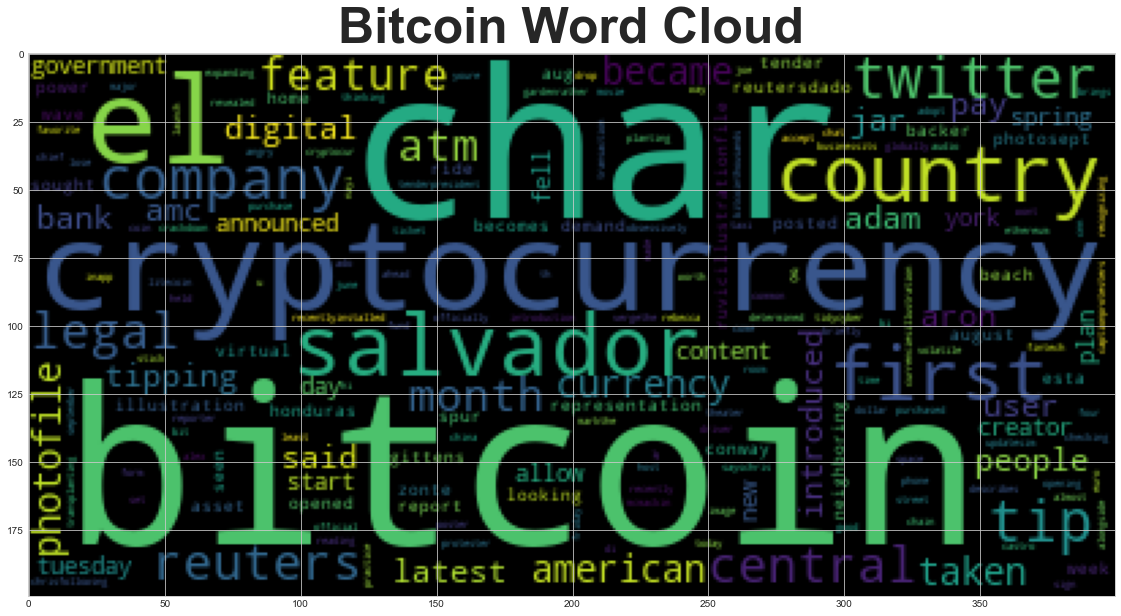

In [43]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

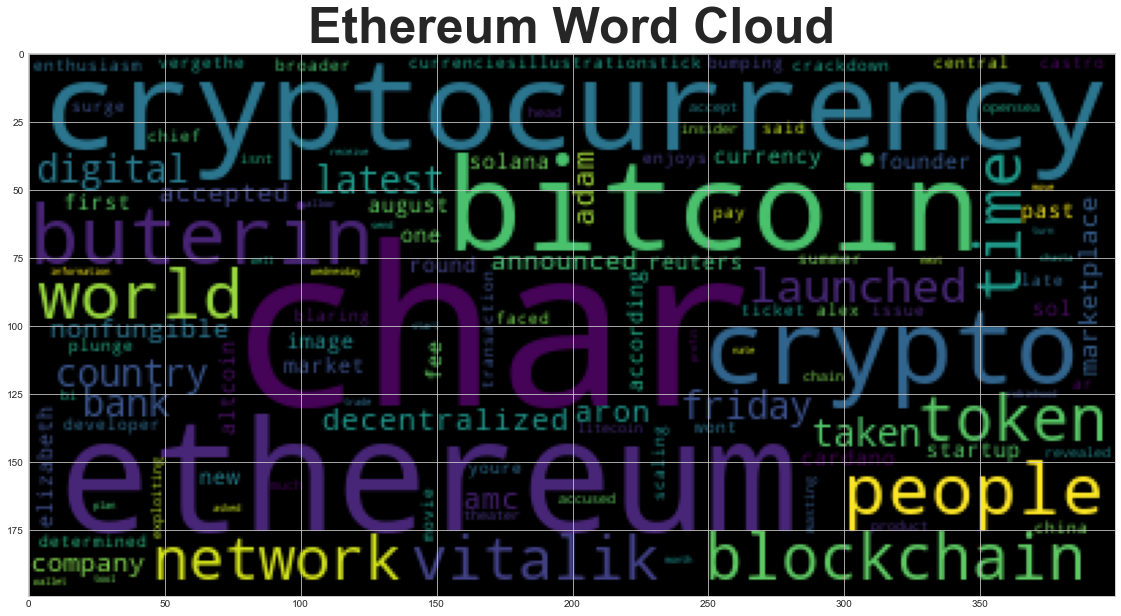

In [44]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

In [45]:
 import spacy
from spacy import displacy

In [46]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [47]:
# Concatenate all of the bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [49]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [50]:
# Render the visualization
displacy.render(doc, style='ent')

In [51]:
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Bitcoin PERSON
AMC ORG
Adam Aron PERSON
Ethereum, Litecoin and Bi ORG
Four months DATE
Twitter first LAW
first ORDINAL
Alex Castro PERSON
The Verge
 ORG
The Peoples Bank of China ORG
Friday DATE
Bitcoin ATM PERSON
today DATE
Bitcoin PERSON
El Salvador GPE
US GPE
Central American NORP
first ORDINAL
El Salvador GPE
at least 200 CARDINAL
Tuesday DATE
Spaces ORG
El Salvador GPE
Nayi PERSON
Joe PERSON
Taxi PERSON
Chris PERSON
almost 2,500 CARDINAL
2,100 MONEY
Chris PERSON
New York GPE
CNN ORG
about 10% PERCENT
Tuesday DATE
$43,000 mark MONEY
El Salvador GPE
June DATE
just days DATE
September DATE
spring DATE
Rebecca McMackin PERSON
Bitcoin PERSON
August 6, 2021 DATE
Reuters ORG
19 CARDINAL
16 CARDINAL
Bitcoins PERSON
Bitcoin PERSON
August 6, 2021 DATE
Reuters ORG
Adam Aron PERSON
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
+1733 CARDINAL
El Zonte PERSON
El Salvador GPE
Bitcoin Beach GPE
Central American NORP
Conway G. Gittens PERSON
El Zonte P

In [52]:
# Concatenate all of the bitcoin text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [53]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [54]:
# Render the visualization
displacy.render(doc, style='ent')

In [55]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Alex Castro PERSON
The Verge
 ORG
The Peoples Bank of China ORG
Friday DATE
Bitcoin PERSON
AMC ORG
Adam Aron PERSON
Ethereum, Litecoin and Bi ORG
Nate Chasta PERSON
Robinhood PRODUCT
next month DATE
Wednesday DATE
Sorare ORG
French NORP
Sorare ORG
SoftBank ORG
Vision Fund 2 ORG
$680 million MONEY
4 MONEY
Vitalik GPE
Vitalik Buterin PERSON
2013 DATE
Getty Images PERSON
John Phillips PERSON
Vitalik Buterin PERSON
eight CARDINAL
JRR Tolkien's ORG
this past weekend DATE
El Salvador GPE
Bitcoin ORG
Elizabeth Warren PERSON
AFP ORG
Getty Images ORG
Elizabeth Warren PERSON
Justin Sullivan/Getty Images PERSON
CoinDesk ORG
two CARDINAL
one CARDINAL
LONDON GPE
Reuters ORG
September DATE
Bitcoin PERSON
August 6, 2021 DATE
Reuters ORG
Adam Aron PERSON
Solana PERSON
above $100 MONEY
first ORDINAL
Monday DATE
more than 200% PERCENT
August DATE
UKits ORG
first ORDINAL
PayPal PERSON
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
Vitalik Buterin PERSON
2015 DATE
John Phillips PERSON
Vitalik Bu